In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [14]:
def f(x,y):
    return x + 2*y  

In [15]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [16]:
N = 10
t = np.linspace(0,1,N)


In [17]:
yext = Solucion(t)

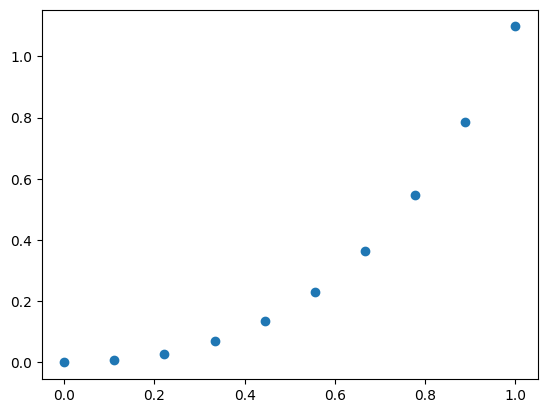

In [18]:
plt.scatter(t,yext)

In [20]:
def GetEuler(f,x,y0):
    
    h = x[1] - x[0]
    
    y = np.zeros_like(x)
    y[0] = y0
    
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1]+h*k1
        
    return y

In [21]:
yrk1 = GetEuler(f,t,0)

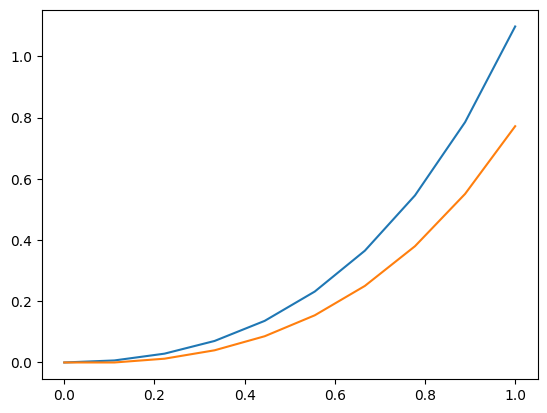

In [22]:
plt.plot(t,yext)
plt.plot(t,yrk1)

In [29]:
def GetAdams(f,x,yrk1):
    
    h = x[1] - x[0]
    
    y = yrk1.copy()
    
    yc = y.copy()
    
    for i in range(2,len(x)):
        
        y[i] = y[i-1] + 0.5*h*( 3*f(x[i-1],y[i-1]) - f(x[i-2],y[i-2]) )
        
        yc[i] = y[i]
        
        # Moulton 2 orden
       # yc[i] = yc[i-1] + 0.5*h*( f(x[i],y[i]) +  f(x[i-1],y[i-1]) )
        
        # Moulton 3 orden
        yc[i] = yc[i-1] + h*( 5*f(x[i],y[i]) + 8*f(x[i-1],y[i-1]) - f(x[i-2],y[i-2]) )/12
        
    
    return y,yc

In [30]:
ybash2,ymoulton2 = GetAdams(f,t,yrk1)

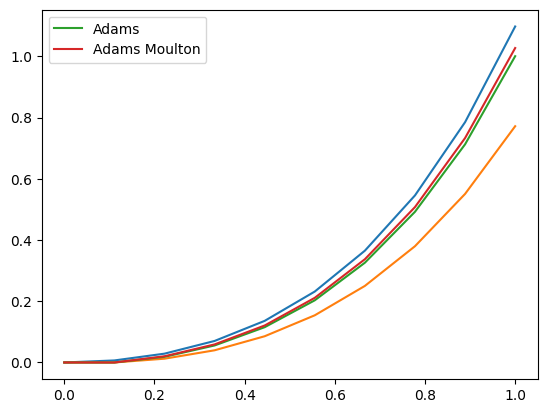

In [31]:
plt.plot(t,yext)
plt.plot(t,yrk1)
plt.plot(t,ybash2,label='Adams')
plt.plot(t,ymoulton2,label='Adams Moulton')
plt.legend()